In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')
print(df.columns.tolist())


['Customer ID', 'Age', 'Gender', 'Loyalty Member', 'Product Type', 'SKU', 'Rating', 'Order Status', 'Payment Method', 'Total Price', 'Unit Price', 'Quantity', 'Purchase Date', 'Shipping Type', 'Add-ons Purchased', 'Add-on Total']


In [10]:
#Task 1
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

df['Month'] = df['Purchase Date'].dt.to_period('M')
df['Quarter'] = df['Purchase Date'].dt.to_period('Q')

preferred_payment = (
    df.groupby('Customer ID')['Payment Method']
    .agg(lambda x: x.value_counts().index[0])
    .reset_index()
)
preferred_payment.columns = ['Customer ID', 'Preferred Payment Method']

total = df.groupby('Customer ID')['Total Price'].sum().reset_index()
total.columns = ['Customer ID', 'Total Spent']

accessory = df.groupby('Customer ID')['Add-on Total'].sum().reset_index()
accessory.columns = ['Customer ID', 'Accessory Spent']

customer_analysis = (
    preferred_payment
    .merge(total, on='Customer ID')
    .merge(accessory, on='Customer ID')
)

print(customer_analysis.head(10))  # первые 10 строк

   Customer ID Preferred Payment Method  Total Spent  Accessory Spent
0         1000              Credit Card      6279.42            66.30
1         1002              Credit Card      5020.60            60.16
2         1003                     Cash        41.50            35.56
3         1004              Credit Card        83.00            65.78
4         1005                   Paypal     11779.11            75.33
5         1006               Debit Card     12184.27           133.43
6         1007              Credit Card      7120.71            55.48
7         1008                     Cash      3379.32            65.85
8         1011              Credit Card      7911.90            70.17
9         1013                   Paypal      5538.33            57.81


In [23]:
#Task 2

# 1. Доход по методам доставки
delivery_revenue = df.groupby('Shipping Type')['Total Price'].sum().reset_index()
delivery_revenue.columns = ['Shipping Type', 'Revenue']

# 2. Доход по типам продукта
product_revenue = df.groupby('Product Type')['Total Price'].sum().reset_index()
product_revenue.columns = ['Product Type', 'Revenue']

# 3. Доход от доп. услуг по месяцам
monthly_accessory = df.groupby('Month')['Add-on Total'].sum().reset_index()
monthly_accessory.columns = ['Month', 'Accessory Revenue']
monthly_accessory['Month'] = monthly_accessory['Month'].astype(str)

# 4. Доход от доп. услуг по кварталам
quarterly_accessory = df.groupby('Quarter')['Add-on Total'].sum().reset_index()
quarterly_accessory.columns = ['Quarter', 'Accessory Revenue']
quarterly_accessory['Quarter'] = quarterly_accessory['Quarter'].astype(str)


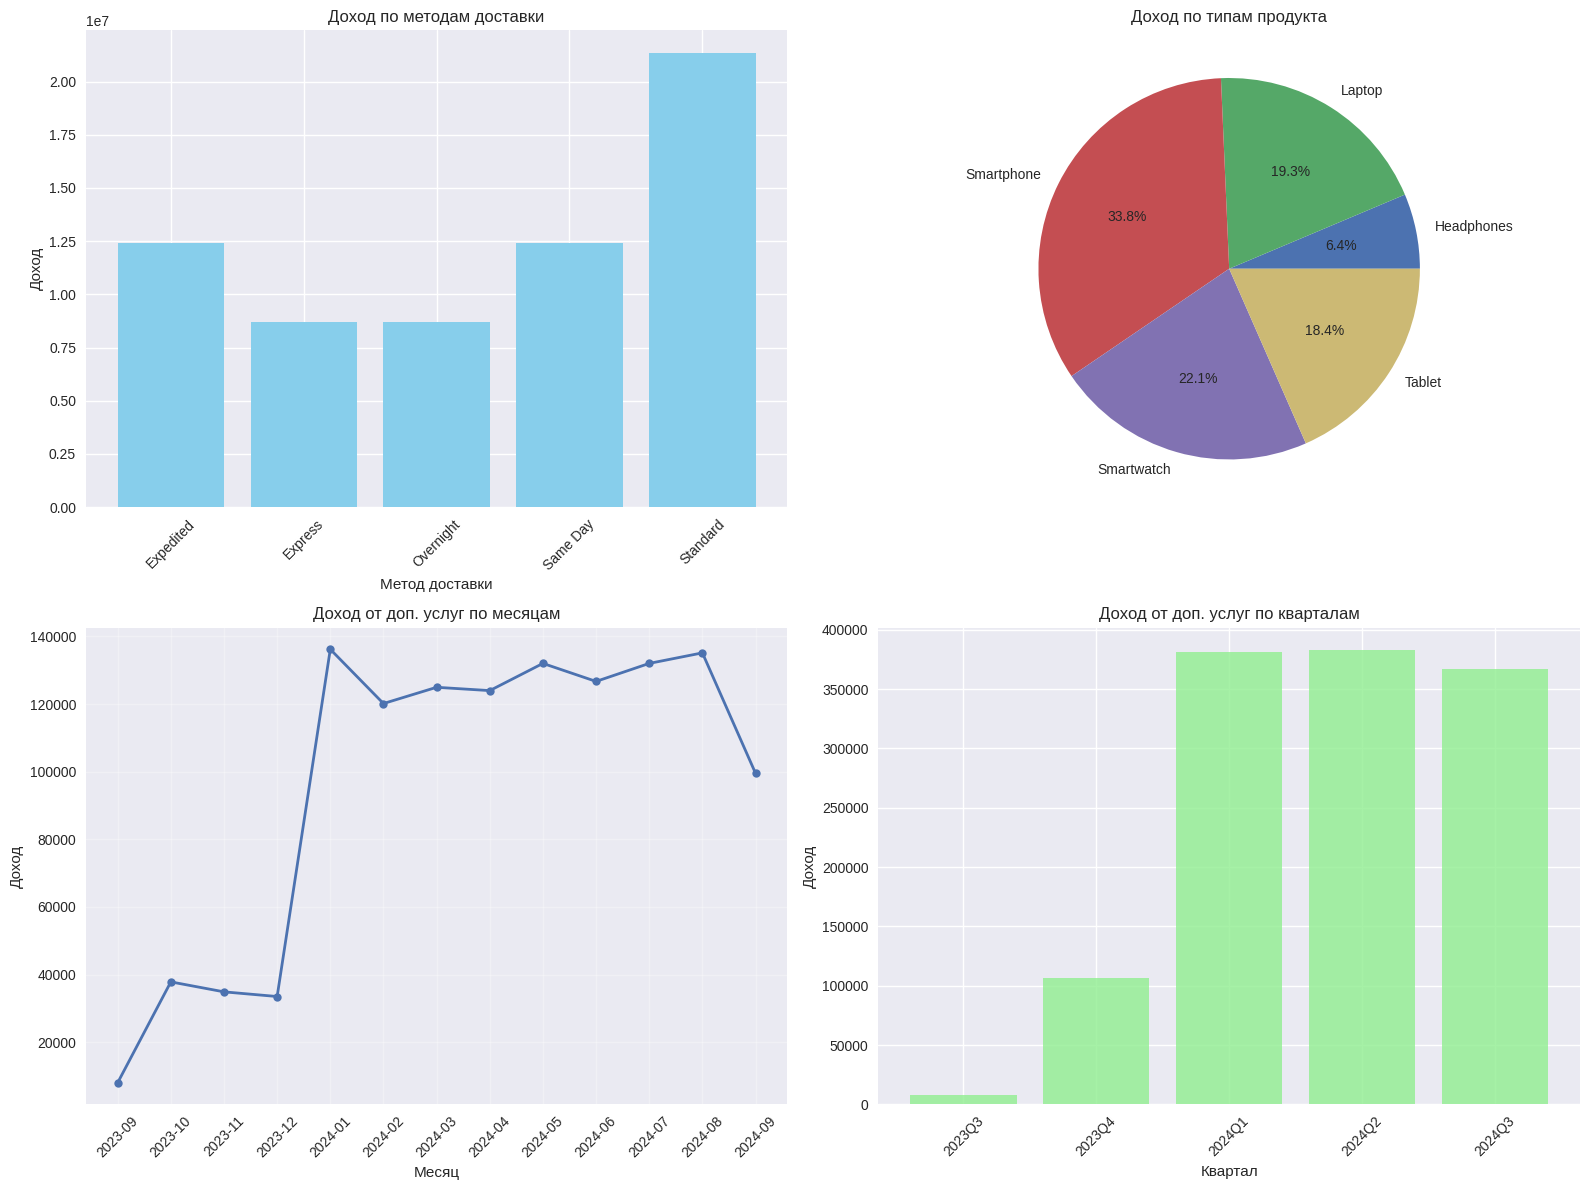

In [24]:
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Доход по методам доставки
axes[0, 0].bar(delivery_revenue['Shipping Type'], delivery_revenue['Revenue'], color='skyblue')
axes[0, 0].set_title('Доход по методам доставки')
axes[0, 0].set_xlabel('Метод доставки')
axes[0, 0].set_ylabel('Доход')
axes[0, 0].tick_params(axis='x', rotation=45)


# 2. Доход по типам продукта
axes[0, 1].pie(product_revenue['Revenue'], labels=product_revenue['Product Type'], autopct='%1.1f%%')
axes[0, 1].set_title('Доход по типам продукта')

# 3. Доход от доп. услуг по месяцам
axes[1, 0].plot(monthly_accessory['Month'], monthly_accessory['Accessory Revenue'],
                marker='o', linewidth=2, markersize=6)
axes[1, 0].set_title('Доход от доп. услуг по месяцам')
axes[1, 0].set_xlabel('Месяц')
axes[1, 0].set_ylabel('Доход')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Доход от доп. услуг по кварталам
axes[1, 1].bar(quarterly_accessory['Quarter'], quarterly_accessory['Accessory Revenue'],
               color='lightgreen', alpha=0.8)
axes[1, 1].set_title('Доход от доп. услуг по кварталам')
axes[1, 1].set_xlabel('Квартал')
axes[1, 1].set_ylabel('Доход')
axes[1, 1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()